In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
wine=pd.read_csv("winequalityN - winequalityN.csv")

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine['type'].unique()

array(['white', 'red'], dtype=object)

In [22]:
wine['type'].isnull().sum()

np.int64(0)

In [23]:
dic={'white':0,'red':1}
wine['type']=wine['type'].map(dic)

In [24]:
wine['type'].unique()

array([0, 1])

In [ ]:
wine.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [25]:
y=wine['type']
y.unique()

array([0, 1])

In [26]:
wine[wine['fixed acidity'].isnull()]=np.mean(wine['fixed acidity'])
wine[wine['volatile acidity'].isnull()]=np.mean(wine['volatile acidity'])
wine[wine['citric acid'].isnull()]=np.mean(wine['citric acid'])
wine[wine['residual sugar'].isnull()]=np.mean(wine['residual sugar'])
wine[wine['chlorides'].isnull()]=np.mean(wine['chlorides'])
wine[wine['pH'].isnull()]=np.mean(wine['pH'])
wine[wine['sulphates'].isnull()]=np.mean(wine['sulphates'])

<ipython-input-26-5a580c87d89e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.2165793124710955' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wine[wine['fixed acidity'].isnull()]=np.mean(wine['fixed acidity'])
<ipython-input-26-5a580c87d89e>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.2165793124710955' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  wine[wine['fixed acidity'].isnull()]=np.mean(wine['fixed acidity'])


In [27]:
wine[wine['quality'].isnull()]=np.mean(wine['quality'])
X=wine.drop('type',axis=1)

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
x_train.shape

(5197, 12)

In [32]:
y_train.shape

(5197,)

In [33]:
y.unique()

array([0, 1])

In [34]:

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dt()

In [36]:
y_train_pred=dt.predict(x_train)
print(accuracy_score(y_train, y_train_pred))

0.9988454877814124


In [37]:
y_test_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_test_pred))

0.9861538461538462


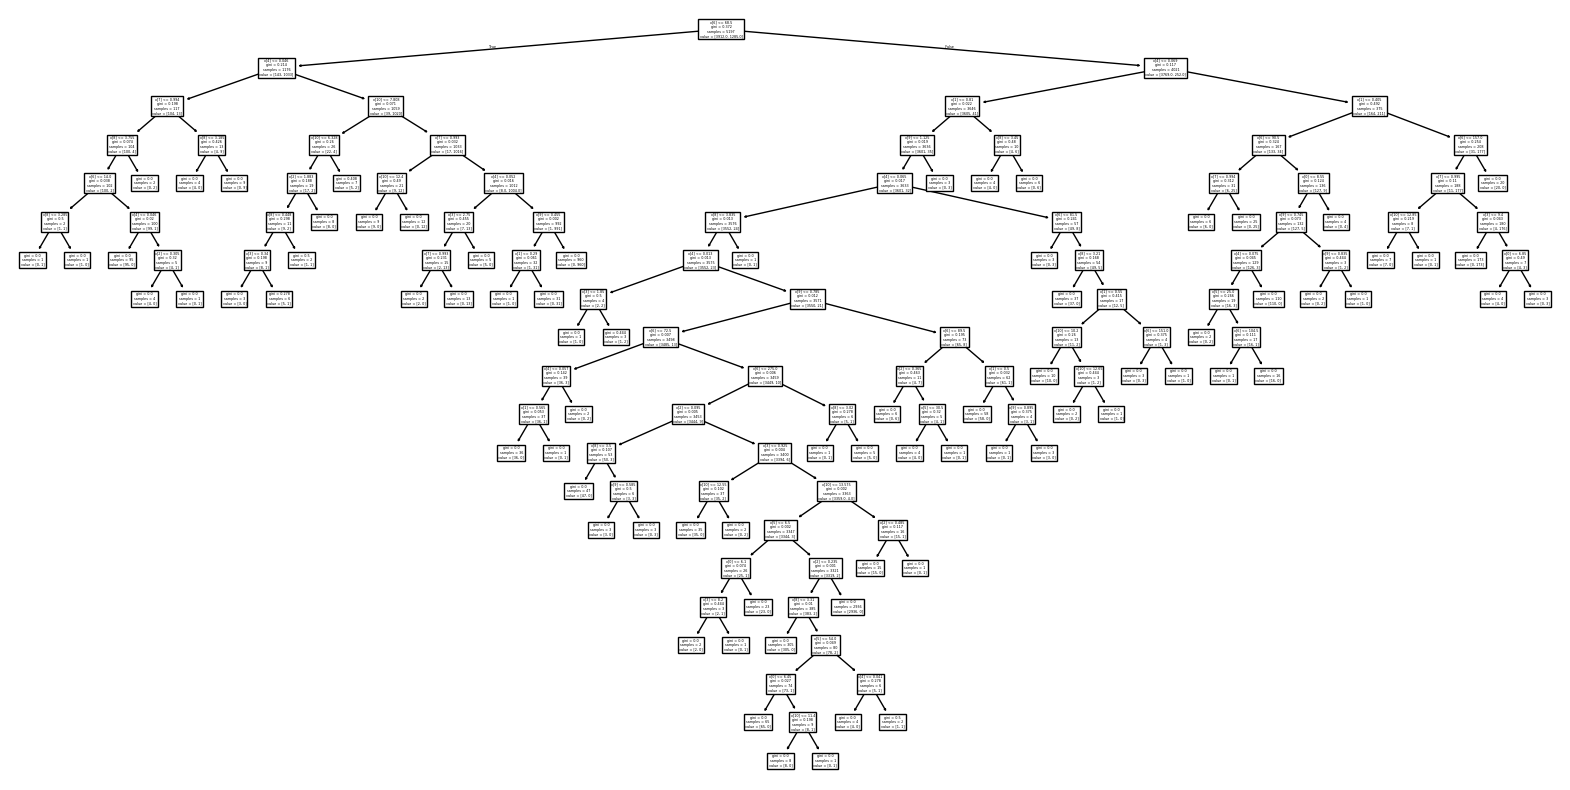

In [41]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt)
plt.show()

In [ ]:
#Data Visualisation

In [42]:
x_train_trf=PCA(n_components=2).fit_transform(x_train)


In [43]:
import plotly.express as px
y_train_trf=y_train.astype(str)
px.scatter(x=x_train_trf[:,0],y=x_train_trf[:,1],color=y_train_trf,color_discrete_sequence=px.colors.qualitative.G10).show()



In [44]:
x_train_trf=PCA(n_components=3).fit_transform(x_train)

In [45]:
(px.scatter_3d(x=x_train_trf[:,0],y=x_train_trf[:,1],z=x_train_trf[:,2],color=y_train_trf)).update_layout(margin=dict(l=0,r=0,b=0,t=0)).show()